In [42]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [43]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Vérification de la fiabilité de la prédeiction

In [44]:
parties_du_corps=["Bassin","HancheD","GenouD","ChevilleD","HancheG","GenouG","ChevilleG","Colonne","Thorax","Cou","Tete","EpauleG","CoudeG","PoignetG","EpauleD","CoudeD","PoignetD"]
path="./data/points"
points = os.listdir(path)
points = [f for f in points if os.path.isfile(os.path.join(path, f))]
scores=[]
for ele in points:
    df=pd.DataFrame(pd.read_json(os.path.join(path, ele))['instances'].str[0].str.get('keypoint_scores').to_list())
    df.columns=parties_du_corps
    scores.append(df)

In [45]:
for i in range(len(scores)):
    minimum=scores[i].min()
    for i in range(17):
        if minimum[i]!=1:
            print(i)

On peut voir que l'ia de détection des points a toujours été sûre d'elle lors des prédictions de points. Donc toute les données sont utilisables.

# Recupération des points

In [46]:
parties_du_corps=["Bassin","HancheD","GenouD","ChevilleD","HancheG","GenouG","ChevilleG","Colonne","Thorax","Cou","Tete","EpauleG","CoudeG","PoignetG","EpauleD","CoudeD","PoignetD"]
path="./data/points"
points = os.listdir(path)
points = [f for f in points if os.path.isfile(os.path.join(path, f))]
datas=[]
for ele in points:
    df=pd.DataFrame(pd.read_json(os.path.join(path, ele))['instances'].str[0].str.get('keypoints').to_list())
    df.columns=parties_du_corps
    datas.append(df)
    

In [47]:
datas[0].describe()

,Bassin,HancheD,GenouD,ChevilleD,HancheG,GenouG,ChevilleG,Colonne,Thorax,Cou,Tete,EpauleG,CoudeG,PoignetG,EpauleD,CoudeD,PoignetD
count,639,639,639,639,639,639,639,639,639,639,639,639,639,639,639,639,639
unique,639,639,639,639,639,639,639,639,639,639,639,639,639,639,639,639,639
top,"[-0.0, 0.0, 0.7593588829040521]","[0.08651806414127301, -0.10648385435342701, 0....","[0.04174243286252, -0.14217326045036302, 0.387...","[0.009176269173622001, -0.013015318661928002, ...","[-0.08041528612375201, 0.11247754096984801, 0....","[-0.11537133902311301, 0.35674405097961404, 0....","[0.05012963712215401, 0.6188527941703791, 0.19...","[0.001279785181395, -0.014751312322914002, 0.9...","[0.015425292775034, 0.07461367547512, 1.207973...","[0.030669678002595003, -0.036371625959873005, ...","[0.034225340932607005, 0.10570855438709201, 1....","[-0.11801952868700001, 0.08621537685394201, 1....","[-0.30278760194778404, 0.146564751863479, 1.09...","[-0.47729247808456404, -0.018800392746925, 1.0...","[0.14940381050109802, -0.091575898230075, 1.18...","[0.29977318644523604, -0.342856496572494, 1.12...","[0.463740736246109, -0.59499168395996, 1.10003..."
freq,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


# Moyennes

In [48]:
moyennes_x=[]
moyennes_y=[]
moyennes_z=[]
for i in range(17):
    moyennes_x_temp=[]
    moyennes_y_temp=[]
    moyennes_z_temp=[]
    for j in range(len(datas)):
        moyennes_x_temp.append(datas[j][parties_du_corps[i]].str[0].mean())
        moyennes_y_temp.append(datas[j][parties_du_corps[i]].str[1].mean())
        moyennes_z_temp.append(datas[j][parties_du_corps[i]].str[2].mean())
    moyennes_x.append(moyennes_x_temp)
    moyennes_y.append(moyennes_y_temp)
    moyennes_z.append(moyennes_z_temp)

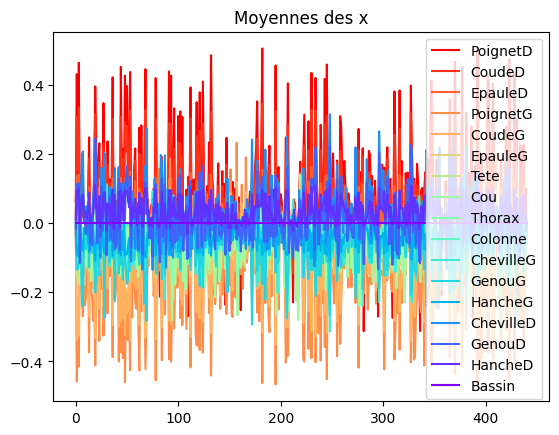

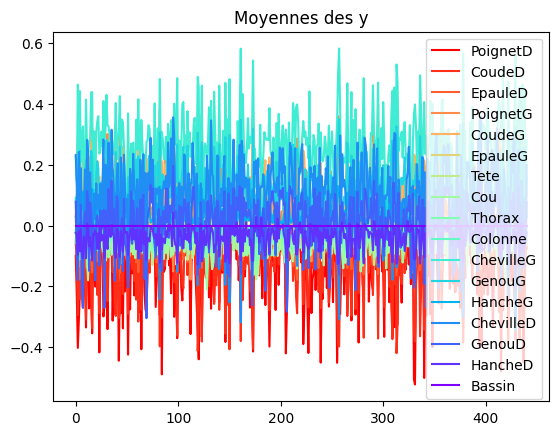

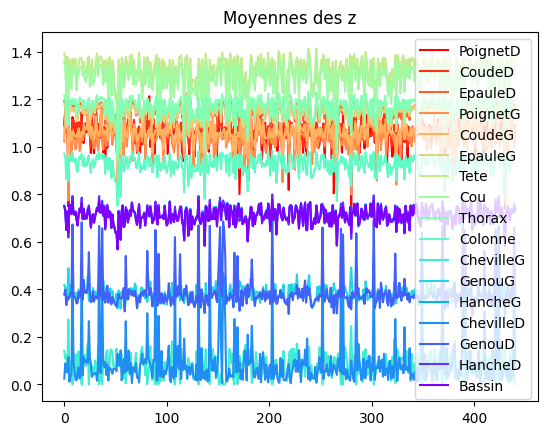

In [49]:
cmap = plt.get_cmap('rainbow')
colors = [cmap(i) for i in np.linspace(0, 1, 17)]

for i in range(16,-1,-1):
    plt.plot(moyennes_x[i],label=parties_du_corps[i],color=colors[i])
plt.title("Moyennes des x")
plt.legend()
plt.show()
for i in range(16,-1,-1):
    plt.plot(moyennes_y[i],label=parties_du_corps[i],color=colors[i])
plt.title("Moyennes des y")
plt.legend()
plt.show()
for i in range(16,-1,-1):
    plt.plot(moyennes_z[i],label=parties_du_corps[i],color=colors[i])
plt.title("Moyennes des z")
plt.legend()
plt.show()


In [50]:
affichage_partie_du_corps=""
for i,ele in enumerate(parties_du_corps):
    affichage_partie_du_corps+=str(i+1)+" : "+ele+", "

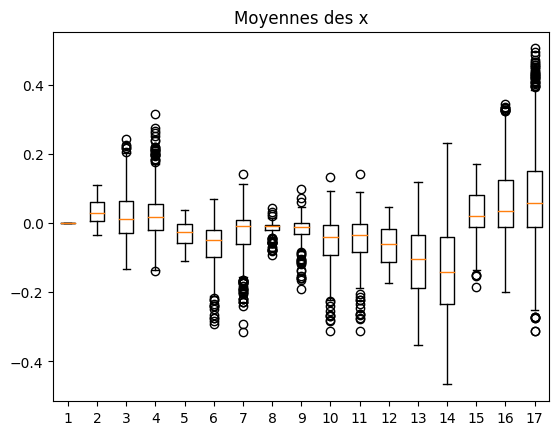

1 : Bassin, 2 : HancheD, 3 : GenouD, 4 : ChevilleD, 5 : HancheG, 6 : GenouG, 7 : ChevilleG, 8 : Colonne, 9 : Thorax, 10 : Cou, 11 : Tete, 12 : EpauleG, 13 : CoudeG, 14 : PoignetG, 15 : EpauleD, 16 : CoudeD, 17 : PoignetD, 


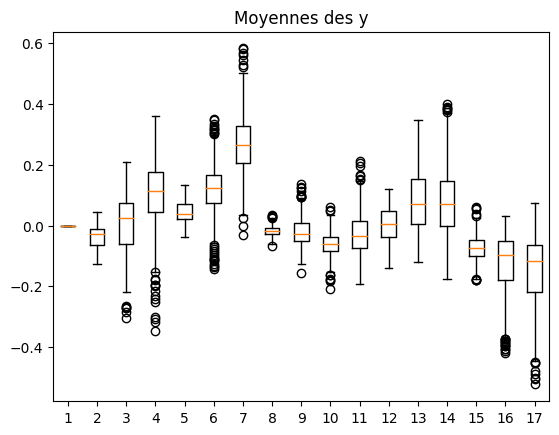

1 : Bassin, 2 : HancheD, 3 : GenouD, 4 : ChevilleD, 5 : HancheG, 6 : GenouG, 7 : ChevilleG, 8 : Colonne, 9 : Thorax, 10 : Cou, 11 : Tete, 12 : EpauleG, 13 : CoudeG, 14 : PoignetG, 15 : EpauleD, 16 : CoudeD, 17 : PoignetD, 


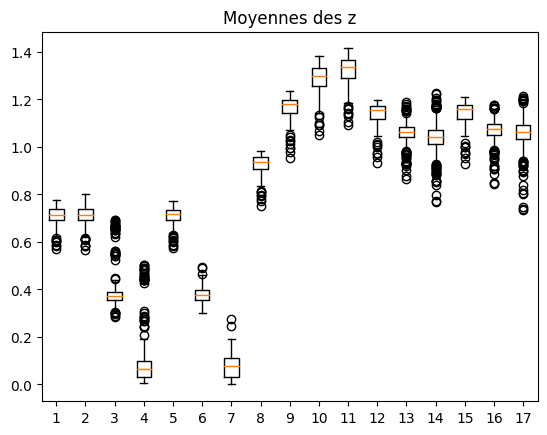

1 : Bassin, 2 : HancheD, 3 : GenouD, 4 : ChevilleD, 5 : HancheG, 6 : GenouG, 7 : ChevilleG, 8 : Colonne, 9 : Thorax, 10 : Cou, 11 : Tete, 12 : EpauleG, 13 : CoudeG, 14 : PoignetG, 15 : EpauleD, 16 : CoudeD, 17 : PoignetD, 


In [51]:
plt.boxplot(moyennes_x)
plt.title("Moyennes des x")
plt.show()
print(affichage_partie_du_corps)
plt.title("Moyennes des y")
plt.boxplot(moyennes_y)
plt.show()
print(affichage_partie_du_corps)
plt.title("Moyennes des z")
plt.boxplot(moyennes_z)
plt.show()
print(affichage_partie_du_corps)

On peut voir que l'on a des parties qui sont plus stables que d'autres sur l'ensemble de notre data set par exemple on peut voir que les poignets varient beaucoup plus que le thorax par exemple d'une video a une autre. On peut aussi voir que les hauteurs ne varie pas trop par exemple la tete reste bien en haut et les chevilles en bas. Aussi on remarque que le bassin ne bouge pas sur les axes x et y et reste en (0,0) donc on en déduit qu'il est l'origine des coordonnées x et y.

# Ecart types

In [52]:
ecarts_types_x=[]
ecarts_types_y=[]
ecarts_types_z=[]
for i in range(17):
    ecarts_types_x_temp=[]
    ecarts_types_y_temp=[]
    ecarts_types_z_temp=[]
    for j in range(len(datas)):
        ecarts_types_x_temp.append(datas[j][parties_du_corps[i]].str[0].std())
        ecarts_types_y_temp.append(datas[j][parties_du_corps[i]].str[1].std())
        ecarts_types_z_temp.append(datas[j][parties_du_corps[i]].str[2].std())
    ecarts_types_x.append(ecarts_types_x_temp)
    ecarts_types_y.append(ecarts_types_y_temp)
    ecarts_types_z.append(ecarts_types_z_temp)

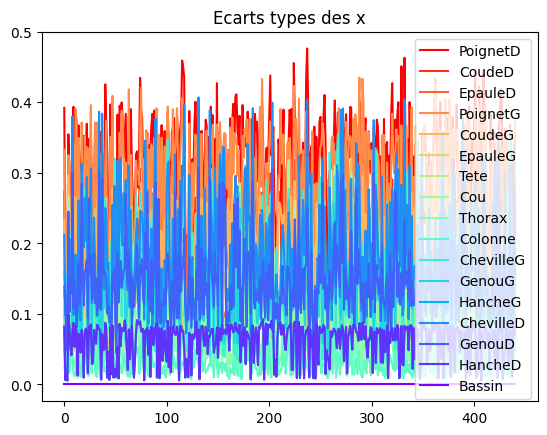

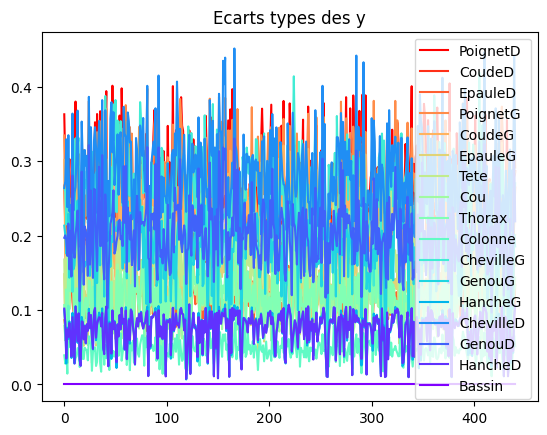

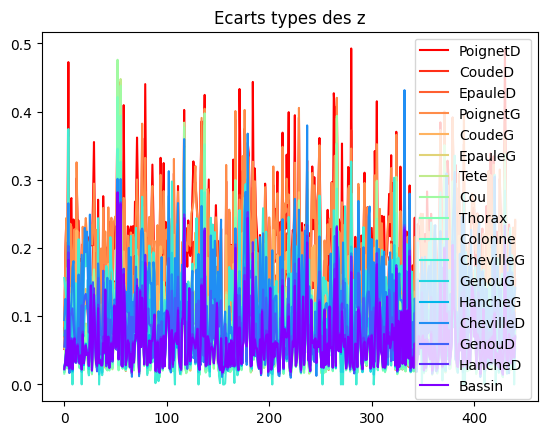

In [53]:
cmap = plt.get_cmap('rainbow')
colors = [cmap(i) for i in np.linspace(0, 1, 17)]

for i in range(16,-1,-1):
    plt.plot(ecarts_types_x[i],label=parties_du_corps[i],color=colors[i])
plt.title("Ecarts types des x")
plt.legend()
plt.show()
for i in range(16,-1,-1):
    plt.plot(ecarts_types_y[i],label=parties_du_corps[i],color=colors[i])
plt.title("Ecarts types des y")
plt.legend()
plt.show()
for i in range(16,-1,-1):
    plt.plot(ecarts_types_z[i],label=parties_du_corps[i],color=colors[i])
plt.title("Ecarts types des z")
plt.legend()
plt.show()

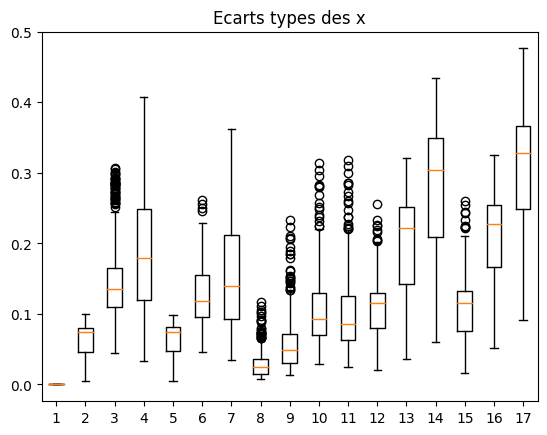

1 : Bassin, 2 : HancheD, 3 : GenouD, 4 : ChevilleD, 5 : HancheG, 6 : GenouG, 7 : ChevilleG, 8 : Colonne, 9 : Thorax, 10 : Cou, 11 : Tete, 12 : EpauleG, 13 : CoudeG, 14 : PoignetG, 15 : EpauleD, 16 : CoudeD, 17 : PoignetD, 


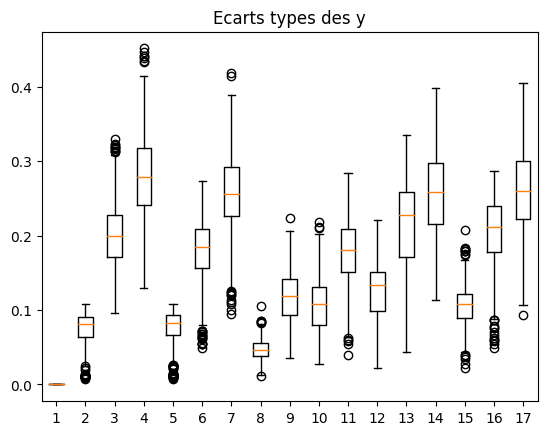

1 : Bassin, 2 : HancheD, 3 : GenouD, 4 : ChevilleD, 5 : HancheG, 6 : GenouG, 7 : ChevilleG, 8 : Colonne, 9 : Thorax, 10 : Cou, 11 : Tete, 12 : EpauleG, 13 : CoudeG, 14 : PoignetG, 15 : EpauleD, 16 : CoudeD, 17 : PoignetD, 


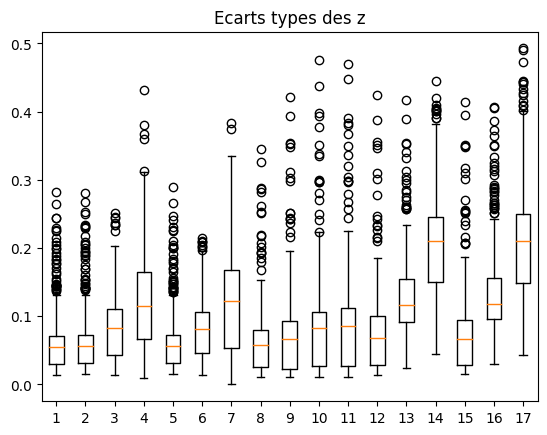

1 : Bassin, 2 : HancheD, 3 : GenouD, 4 : ChevilleD, 5 : HancheG, 6 : GenouG, 7 : ChevilleG, 8 : Colonne, 9 : Thorax, 10 : Cou, 11 : Tete, 12 : EpauleG, 13 : CoudeG, 14 : PoignetG, 15 : EpauleD, 16 : CoudeD, 17 : PoignetD, 


In [54]:
plt.boxplot(ecarts_types_x)
plt.title("Ecarts types des x")
plt.show()
print(affichage_partie_du_corps)
plt.title("Ecarts types des y")
plt.boxplot(ecarts_types_y)
plt.show()
print(affichage_partie_du_corps)
plt.title("Ecarts types des z")
plt.boxplot(ecarts_types_z)
plt.show()
print(affichage_partie_du_corps)

On voit que certaines parties du corps comme les poignets et les chevilles sont plus dispersé autour de la moyenne que d'autre comme le thorax et la colonne sur les axes x et y. On peut aussi voir que les parties du corps reste un peu plus stable sur la hauteur (l'axe z) que dans les autres directions et qu'il y a moins de différences entre elles que sur les autres axes. On remarque que le bassin ne bouge pas dans les axes x et y.

# Correlation

On creer un dataframe contenant toute nos videos pour la suite.

In [55]:
all_datas=pd.concat(datas)

Maintenant on regarde quels variables sont corrélées  
Pour les x

In [56]:
all_datas.apply(lambda col: col.str[0]).corr()

,Bassin,HancheD,GenouD,ChevilleD,HancheG,GenouG,ChevilleG,Colonne,Thorax,Cou,Tete,EpauleG,CoudeG,PoignetG,EpauleD,CoudeD,PoignetD
Bassin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HancheD,NaN,1.000000,0.614315,0.415959,-0.999194,-0.607512,-0.375367,0.025406,0.036999,0.096443,0.092398,-0.697251,-0.762088,-0.642046,0.699676,0.744119,0.625565
GenouD,NaN,0.614315,1.000000,0.776801,-0.623044,-0.225834,-0.235503,0.095321,0.124188,0.283322,0.265251,-0.338381,-0.355081,-0.236900,0.466776,0.519184,0.490564
ChevilleD,NaN,0.415959,0.776801,1.000000,-0.421689,-0.292587,-0.248843,-0.080297,-0.055531,0.021568,0.019766,-0.296958,-0.264835,-0.188312,0.199627,0.262918,0.242461
HancheG,NaN,-0.999194,-0.623044,-0.421689,1.000000,0.599267,0.370458,-0.044417,-0.056271,-0.114256,-0.110296,0.684276,0.754084,0.634666,-0.712949,-0.753084,-0.633889
GenouG,NaN,-0.607512,-0.225834,-0.292587,0.599267,1.000000,0.779184,0.051229,0.069604,0.170273,0.159284,0.434640,0.467094,0.431602,-0.325611,-0.332615,-0.218211
ChevilleG,NaN,-0.375367,-0.235503,-0.248843,0.370458,0.779184,1.000000,-0.111018,-0.090250,-0.029559,-0.027550,0.145941,0.182958,0.164321,-0.258998,-0.234698,-0.163289
Colonne,NaN,0.025406,0.095321,-0.080297,-0.044417,0.051229,-0.111018,1.000000,0.996035,0.852459,0.873999,0.662993,0.354951,0.274930,0.697268,0.418827,0.349091
Thorax,NaN,0.036999,0.124188,-0.055531,-0.056271,0.069604,-0.090250,0.996035,1.000000,0.882467,0.903757,0.653585,0.337792,0.260551,0.706603,0.424424,0.356651
Cou,NaN,0.096443,0.283322,0.021568,-0.114256,0.170273,-0.029559,0.852459,0.882467,1.000000,0.994971,0.511346,0.254265,0.231241,0.657755,0.444892,0.418591


<Axes: >

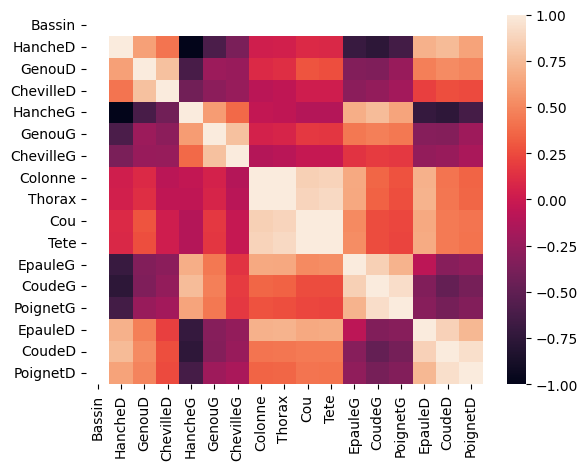

In [57]:
sns.heatmap(all_datas.apply(lambda col: col.str[0]).corr(),vmin=-1, vmax=1)

On peut voir les parties du bras sont corrélées entre elle de même pour les parties des jambes. De plus les hanches sont inversement corrélées, que les parties des bras (poignets,coudes et épaules) et les partie des jambes (surtout les hanches mais aussi les chevilles et les genoux) sont aussi corrélées. Le thorax, la tête, la colonne et le cou sont aussi corrélées.

Pour les y

In [58]:
all_datas.apply(lambda col: col.str[1]).corr()

,Bassin,HancheD,GenouD,ChevilleD,HancheG,GenouG,ChevilleG,Colonne,Thorax,Cou,Tete,EpauleG,CoudeG,PoignetG,EpauleD,CoudeD,PoignetD
Bassin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HancheD,NaN,1.000000,0.566444,0.594894,-0.991215,-0.484690,-0.536201,-0.169125,-0.139874,-0.199442,-0.198165,-0.635876,-0.810072,-0.632735,0.494057,0.799687,0.602939
GenouD,NaN,0.566444,1.000000,0.813340,-0.546850,0.080370,-0.121780,-0.305083,-0.263194,-0.169846,-0.340293,-0.497312,-0.437424,-0.180768,0.145267,0.506930,0.549374
ChevilleD,NaN,0.594894,0.813340,1.000000,-0.570453,-0.174930,-0.221533,-0.326972,-0.223909,-0.241041,-0.235371,-0.474551,-0.480103,-0.350096,0.156184,0.490785,0.396485
HancheG,NaN,-0.991215,-0.546850,-0.570453,1.000000,0.509233,0.565573,0.157499,0.143577,0.187560,0.207489,0.637122,0.816296,0.622571,-0.494204,-0.797186,-0.615867
GenouG,NaN,-0.484690,0.080370,-0.174930,0.509233,1.000000,0.830392,-0.088345,-0.083730,0.069008,-0.106384,0.217036,0.463901,0.513443,-0.367267,-0.387587,-0.126319
ChevilleG,NaN,-0.536201,-0.121780,-0.221533,0.565573,0.830392,1.000000,-0.106657,-0.051194,0.005995,-0.019558,0.252924,0.459673,0.393533,-0.383057,-0.452090,-0.310930
Colonne,NaN,-0.169125,-0.305083,-0.326972,0.157499,-0.088345,-0.106657,1.000000,0.938578,0.914745,0.891679,0.803114,0.324932,0.137064,0.708379,0.035809,-0.101591
Thorax,NaN,-0.139874,-0.263194,-0.223909,0.143577,-0.083730,-0.051194,0.938578,1.000000,0.935480,0.970027,0.819240,0.317599,0.094785,0.749952,0.046578,-0.137240
Cou,NaN,-0.199442,-0.169846,-0.241041,0.187560,0.069008,0.005995,0.914745,0.935480,1.000000,0.889324,0.806089,0.366493,0.245233,0.678757,0.020388,-0.033210


<Axes: >

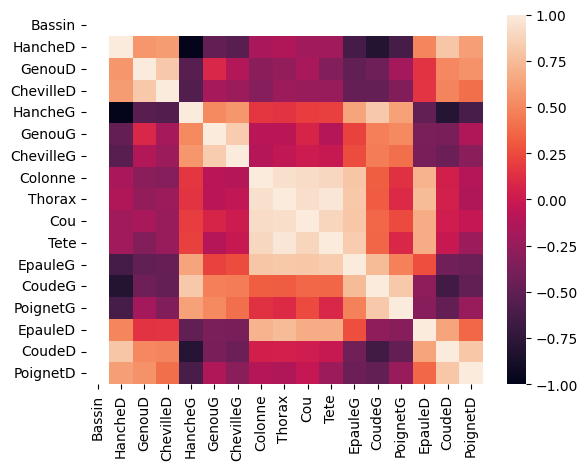

In [59]:
sns.heatmap(all_datas.apply(lambda col: col.str[1]).corr(),vmin=-1, vmax=1)

On retrouve les mêmes observations que sur l'axe x

Pour les z

In [60]:
all_datas.apply(lambda col: col.str[2]).corr()

,Bassin,HancheD,GenouD,ChevilleD,HancheG,GenouG,ChevilleG,Colonne,Thorax,Cou,Tete,EpauleG,CoudeG,PoignetG,EpauleD,CoudeD,PoignetD
Bassin,1.000000,0.985146,0.359066,0.010466,0.983513,0.281042,-0.044716,0.938649,0.786606,0.616569,0.612206,0.750046,0.397330,0.231313,0.760910,0.420110,0.253632
HancheD,0.985146,1.000000,0.429857,0.073662,0.938071,0.182439,-0.126020,0.928073,0.783784,0.622630,0.617089,0.720518,0.369290,0.214157,0.781373,0.458043,0.290704
GenouD,0.359066,0.429857,1.000000,0.772519,0.272165,0.010866,-0.128849,0.307117,0.223587,0.170156,0.159222,0.187692,0.084382,0.060217,0.244461,0.163299,0.124147
ChevilleD,0.010466,0.073662,0.772519,1.000000,-0.056653,-0.092780,-0.121680,-0.054211,-0.116475,-0.103598,-0.116514,-0.127649,-0.047788,-0.012646,-0.091146,-0.013199,0.019494
HancheG,0.983513,0.938071,0.272165,-0.056653,1.000000,0.374978,0.042322,0.920967,0.766495,0.593538,0.590754,0.759034,0.412651,0.238972,0.716494,0.364236,0.202711
GenouG,0.281042,0.182439,0.010866,-0.092780,0.374978,1.000000,0.792036,0.212346,0.110152,0.031418,0.030677,0.156135,0.077001,0.023573,0.075080,-0.005659,-0.042967
ChevilleG,-0.044716,-0.126020,-0.128849,-0.121680,0.042322,0.792036,1.000000,-0.126038,-0.198729,-0.204313,-0.211837,-0.155896,-0.049836,-0.019218,-0.211970,-0.098992,-0.062405
Colonne,0.938649,0.928073,0.307117,-0.054211,0.920967,0.212346,-0.126038,1.000000,0.948890,0.803926,0.805711,0.907546,0.472839,0.276828,0.911235,0.487900,0.290113
Thorax,0.786606,0.783784,0.223587,-0.116475,0.766495,0.110152,-0.198729,0.948890,1.000000,0.909787,0.915610,0.949682,0.489668,0.292769,0.957953,0.515170,0.312496
Cou,0.616569,0.622630,0.170156,-0.103598,0.593538,0.031418,-0.204313,0.803926,0.909787,1.000000,0.991784,0.836178,0.413841,0.265949,0.863719,0.479197,0.319132


<Axes: >

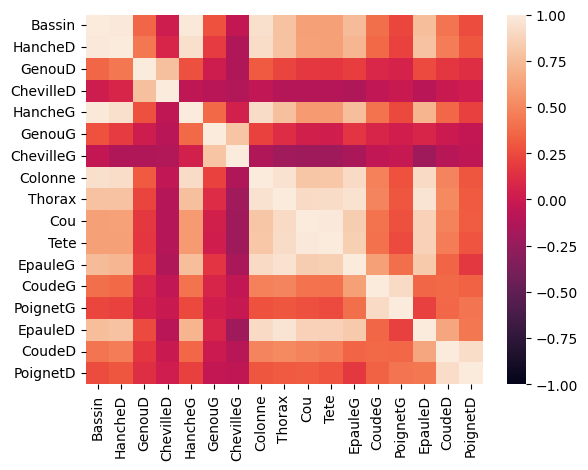

In [61]:
sns.heatmap(all_datas.apply(lambda col: col.str[2]).corr(),vmin=-1, vmax=1)

Sur l'axe z on conserve la corélations entre les hanches gauches et droites, la correlations entre les parties du bras (les poignets et les coudes), la correlation entre le thorax
la tete, la colonne, le coude auquels vient s'ajouter les deux épaules. Mais on perd le correlation dans les jambes les chevilles les genoux et les hanches ne sont moins correlées que sur les autres axes.

# Vitesse et accélération

In [62]:
vitesse_x=all_datas.apply(lambda col: col.str[0]).diff()
vitesse_y=all_datas.apply(lambda col: col.str[1]).diff()
vitesse_z=all_datas.apply(lambda col: col.str[2]).diff()

In [63]:
vitesse_x.describe()

,Bassin,HancheD,GenouD,ChevilleD,HancheG,GenouG,ChevilleG,Colonne,Thorax,Cou,Tete,EpauleG,CoudeG,PoignetG,EpauleD,CoudeD,PoignetD
count,384445.0,3.844450e+05,3.844450e+05,3.844450e+05,3.844450e+05,3.844450e+05,3.844450e+05,3.844450e+05,3.844450e+05,3.844450e+05,3.844450e+05,3.844450e+05,3.844450e+05,3.844450e+05,3.844450e+05,3.844450e+05,3.844450e+05
mean,0.0,-4.610428e-09,1.868568e-07,3.041964e-07,3.974761e-09,1.358454e-07,-2.113658e-07,-9.747780e-08,-2.186543e-07,-4.487375e-07,-4.604109e-07,-1.702345e-07,-1.439918e-07,1.496819e-07,-2.353808e-07,-2.729127e-07,-8.198006e-07
std,0.0,1.088248e-02,2.580491e-02,3.795071e-02,1.081858e-02,2.364710e-02,3.272468e-02,5.417487e-03,1.078869e-02,1.661008e-02,1.635447e-02,1.726487e-02,3.382632e-02,4.812261e-02,1.697539e-02,3.285453e-02,4.793031e-02
min,0.0,-7.437808e-01,-1.342009e+00,-1.580072e+00,-6.138333e-01,-1.180416e+00,-1.609821e+00,-4.085254e-01,-8.577361e-01,-8.915850e-01,-9.490115e-01,-8.600415e-01,-1.100246e+00,-1.306808e+00,-8.590412e-01,-1.164298e+00,-1.326252e+00
25%,0.0,-2.249509e-03,-6.519049e-03,-8.230228e-03,-2.309568e-03,-6.431647e-03,-7.668942e-03,-1.965577e-03,-3.827393e-03,-5.528301e-03,-5.305909e-03,-5.379647e-03,-9.370118e-03,-1.235424e-02,-4.996330e-03,-9.096920e-03,-1.240942e-02
50%,0.0,2.587587e-05,1.171976e-05,2.270937e-05,-2.978742e-05,-1.367182e-05,3.564451e-05,-1.000977e-05,-1.513585e-05,2.563745e-05,2.392381e-05,-7.471442e-05,-9.495020e-05,-1.315922e-04,1.928955e-05,2.709776e-05,1.066886e-04
75%,0.0,2.326906e-03,6.520263e-03,8.057147e-03,2.209470e-03,6.348386e-03,7.756591e-03,1.934571e-03,3.776126e-03,5.660400e-03,5.497802e-03,4.918702e-03,8.500487e-03,1.168849e-02,5.046874e-03,9.203374e-03,1.295215e-02
max,0.0,7.541746e-01,1.343243e+00,1.582407e+00,6.114553e-01,1.036008e+00,1.300464e+00,2.773655e-01,5.706445e-01,8.891594e-01,9.214041e-01,6.586502e-01,1.054530e+00,1.387085e+00,8.459881e-01,1.262607e+00,1.299775e+00


In [64]:
vitesse_y.describe()

,Bassin,HancheD,GenouD,ChevilleD,HancheG,GenouG,ChevilleG,Colonne,Thorax,Cou,Tete,EpauleG,CoudeG,PoignetG,EpauleD,CoudeD,PoignetD
count,384445.0,3.844450e+05,3.844450e+05,3.844450e+05,3.844450e+05,3.844450e+05,3.844450e+05,3.844450e+05,3.844450e+05,3.844450e+05,3.844450e+05,3.844450e+05,3.844450e+05,3.844450e+05,3.844450e+05,3.844450e+05,3.844450e+05
mean,0.0,7.368806e-08,-1.162512e-07,-1.997752e-07,-4.354180e-08,-2.193767e-07,-1.769007e-07,6.894192e-08,4.974444e-08,8.891904e-08,1.588214e-07,5.981775e-08,-1.530622e-07,6.533094e-08,1.990405e-07,3.033367e-07,8.584456e-07
std,0.0,1.387247e-02,4.972832e-02,7.744168e-02,1.402250e-02,4.471231e-02,7.226442e-02,1.383714e-02,3.050224e-02,3.155609e-02,4.291502e-02,2.815513e-02,4.867160e-02,7.248401e-02,2.606783e-02,4.697009e-02,6.781385e-02
min,0.0,-3.424196e-01,-1.183358e+00,-1.968057e+00,-3.757175e-01,-1.163063e+00,-2.014263e+00,-5.339310e-01,-1.061505e+00,-1.129119e+00,-1.150210e+00,-9.082986e-01,-9.382444e-01,-1.271536e+00,-8.502595e-01,-1.164178e+00,-1.113940e+00
25%,0.0,-3.132597e-03,-1.738663e-02,-2.821319e-02,-3.105603e-03,-1.503533e-02,-2.641934e-02,-4.834387e-03,-1.068312e-02,-1.107144e-02,-1.354317e-02,-9.263560e-03,-1.373528e-02,-2.185985e-02,-9.153076e-03,-1.506481e-02,-2.222523e-02
50%,0.0,2.981722e-05,-4.550070e-05,2.182126e-04,-2.150238e-05,1.786053e-04,-6.988645e-05,3.131852e-05,-9.063631e-06,-1.297891e-05,1.259819e-04,-7.304549e-05,3.313869e-04,9.472035e-04,8.060038e-05,-6.759167e-05,-1.419410e-04
75%,0.0,3.252141e-03,1.702961e-02,2.860230e-02,3.024131e-03,1.555803e-02,2.630639e-02,4.885886e-03,1.062318e-02,1.103850e-02,1.386032e-02,8.966655e-03,1.452841e-02,2.432895e-02,9.329302e-03,1.485702e-02,2.192698e-02
max,0.0,3.282329e-01,1.073446e+00,2.031871e+00,3.557214e-01,1.133831e+00,2.049246e+00,5.022450e-01,9.452118e-01,1.049211e+00,1.183384e+00,8.682650e-01,9.212785e-01,1.130110e+00,8.820608e-01,1.009043e+00,1.203191e+00


In [65]:
vitesse_z.describe()

,Bassin,HancheD,GenouD,ChevilleD,HancheG,GenouG,ChevilleG,Colonne,Thorax,Cou,Tete,EpauleG,CoudeG,PoignetG,EpauleD,CoudeD,PoignetD
count,3.844450e+05,3.844450e+05,3.844450e+05,3.844450e+05,3.844450e+05,3.844450e+05,3.844450e+05,3.844450e+05,3.844450e+05,3.844450e+05,3.844450e+05,3.844450e+05,3.844450e+05,3.844450e+05,3.844450e+05,3.844450e+05,3.844450e+05
mean,-1.575222e-07,-1.287252e-07,-1.118585e-07,-6.172799e-21,-1.951507e-07,-2.973570e-07,-4.257946e-07,-1.867407e-07,-2.273930e-07,-6.350997e-07,-5.653391e-07,-2.012680e-07,1.982050e-07,6.784047e-07,-1.609246e-07,2.807872e-07,7.915225e-07
std,1.942892e-02,1.977711e-02,2.764320e-02,3.484914e-02,2.016252e-02,2.647618e-02,3.405063e-02,1.968777e-02,2.238515e-02,2.586386e-02,2.628007e-02,2.325454e-02,3.510561e-02,5.460881e-02,2.354686e-02,3.172584e-02,4.325798e-02
min,-1.184142e+00,-1.204957e+00,-1.533759e+00,-1.513210e+00,-1.207269e+00,-1.534219e+00,-1.507655e+00,-1.330792e+00,-1.459723e+00,-1.518474e+00,-1.841668e+00,-1.438343e+00,-1.459553e+00,-1.492344e+00,-1.451760e+00,-1.450653e+00,-1.487383e+00
25%,-7.372022e-03,-7.688224e-03,-5.995125e-03,0.000000e+00,-7.701397e-03,-6.132334e-03,-7.473230e-04,-6.253183e-03,-5.610228e-03,-6.181836e-03,-5.961657e-03,-6.093264e-03,-8.908868e-03,-1.140064e-02,-6.167650e-03,-8.895874e-03,-1.134843e-02
50%,9.059906e-06,0.000000e+00,0.000000e+00,0.000000e+00,2.682209e-06,-7.301569e-06,0.000000e+00,2.467632e-05,3.051758e-05,-9.655952e-06,-3.099442e-06,3.993511e-05,-9.113550e-05,0.000000e+00,-5.364418e-06,-1.168251e-04,-4.112720e-06
75%,7.472873e-03,7.753432e-03,6.045938e-03,0.000000e+00,7.758319e-03,6.181091e-03,9.137988e-04,6.319702e-03,5.685449e-03,6.153941e-03,5.935907e-03,6.232738e-03,8.615255e-03,1.112521e-02,6.223798e-03,8.512020e-03,1.079595e-02
max,1.457418e+00,1.255682e+00,1.539607e+00,1.584348e+00,1.870883e+00,1.541803e+00,1.562741e+00,1.563720e+00,1.585160e+00,1.899441e+00,1.637422e+00,1.473208e+00,1.498886e+00,1.560158e+00,1.847819e+00,1.500636e+00,1.579047e+00


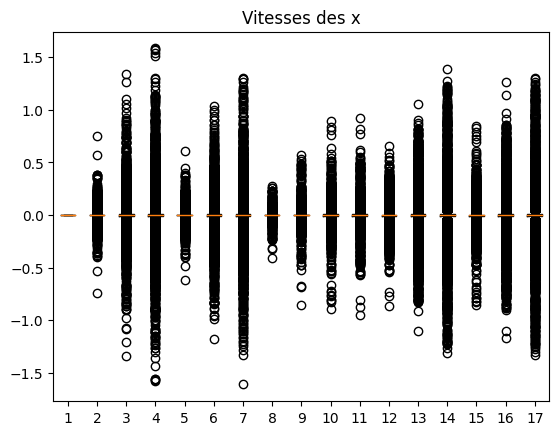

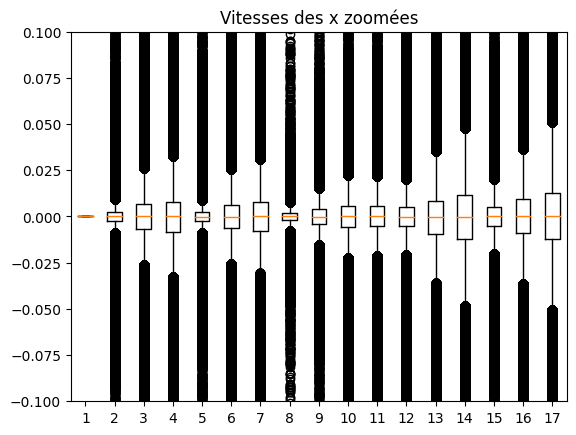

1 : Bassin, 2 : HancheD, 3 : GenouD, 4 : ChevilleD, 5 : HancheG, 6 : GenouG, 7 : ChevilleG, 8 : Colonne, 9 : Thorax, 10 : Cou, 11 : Tete, 12 : EpauleG, 13 : CoudeG, 14 : PoignetG, 15 : EpauleD, 16 : CoudeD, 17 : PoignetD, 


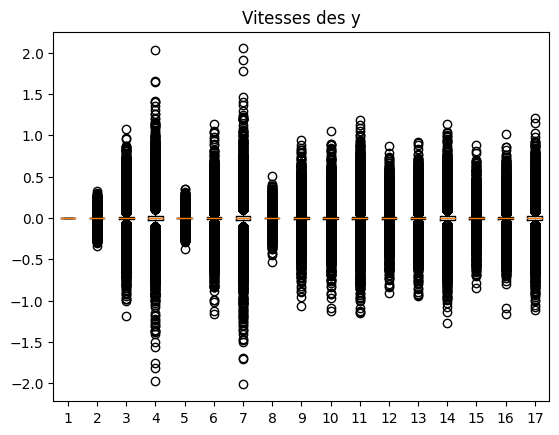

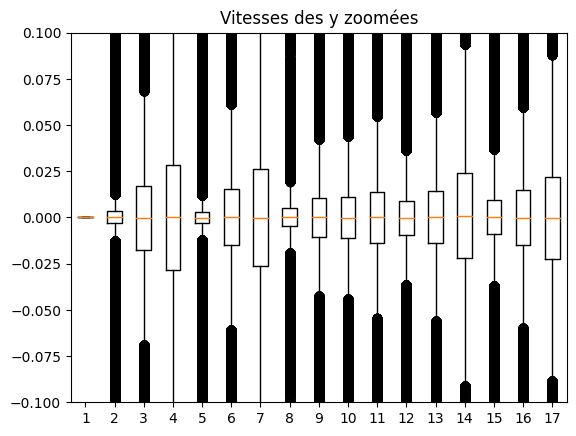

1 : Bassin, 2 : HancheD, 3 : GenouD, 4 : ChevilleD, 5 : HancheG, 6 : GenouG, 7 : ChevilleG, 8 : Colonne, 9 : Thorax, 10 : Cou, 11 : Tete, 12 : EpauleG, 13 : CoudeG, 14 : PoignetG, 15 : EpauleD, 16 : CoudeD, 17 : PoignetD, 


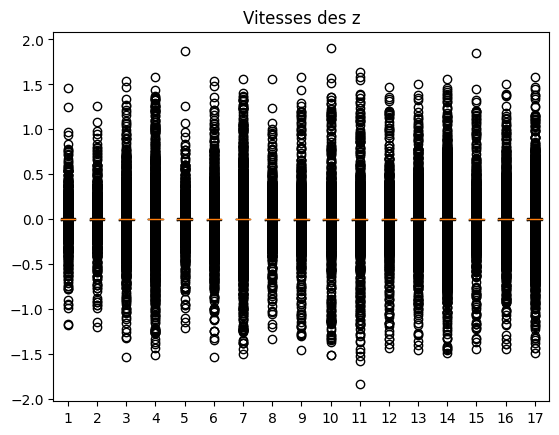

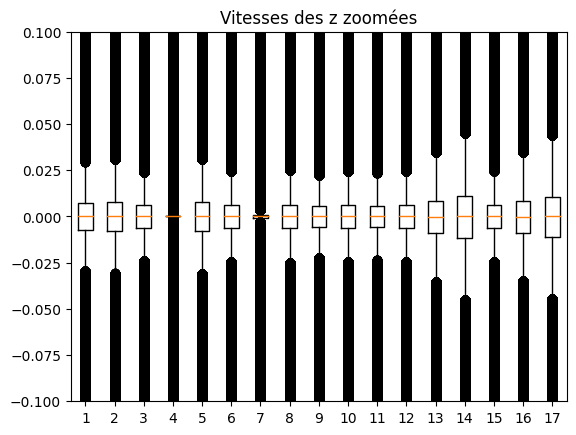

1 : Bassin, 2 : HancheD, 3 : GenouD, 4 : ChevilleD, 5 : HancheG, 6 : GenouG, 7 : ChevilleG, 8 : Colonne, 9 : Thorax, 10 : Cou, 11 : Tete, 12 : EpauleG, 13 : CoudeG, 14 : PoignetG, 15 : EpauleD, 16 : CoudeD, 17 : PoignetD, 


In [66]:
plt.boxplot(vitesse_x.dropna())
plt.title("Vitesses des x")
plt.show()
plt.boxplot(vitesse_x.dropna())
plt.title("Vitesses des x zoomées")
plt.ylim(-0.1,0.1)
plt.show()
print(affichage_partie_du_corps)
plt.boxplot(vitesse_y.dropna())
plt.title("Vitesses des y")
plt.show()
plt.boxplot(vitesse_y.dropna())
plt.title("Vitesses des y zoomées")
plt.ylim(-0.1,0.1)
plt.show()
print(affichage_partie_du_corps)
plt.boxplot(vitesse_z.dropna())
plt.title("Vitesses des z")
plt.show()
plt.boxplot(vitesse_z.dropna())
plt.title("Vitesses des z zoomées")
plt.ylim(-0.1,0.1)
plt.show()
print(affichage_partie_du_corps)

In [67]:
acceleration_x=vitesse_x.diff()
acceleration_y=vitesse_y.diff()
acceleration_z=vitesse_z.diff()

In [68]:
acceleration_x.describe()

,Bassin,HancheD,GenouD,ChevilleD,HancheG,GenouG,ChevilleG,Colonne,Thorax,Cou,Tete,EpauleG,CoudeG,PoignetG,EpauleD,CoudeD,PoignetD
count,384444.0,3.844440e+05,3.844440e+05,3.844440e+05,3.844440e+05,3.844440e+05,3.844440e+05,3.844440e+05,3.844440e+05,3.844440e+05,3.844440e+05,3.844440e+05,3.844440e+05,3.844440e+05,3.844440e+05,3.844440e+05,3.844440e+05
mean,0.0,3.480093e-10,9.959457e-09,1.081930e-08,-1.092284e-09,-2.444999e-10,1.064341e-08,1.089553e-08,2.003452e-08,2.036602e-08,1.140676e-08,1.135533e-08,2.928084e-08,9.652785e-09,2.942436e-08,7.342556e-08,1.249916e-07
std,0.0,1.385772e-02,3.373538e-02,4.981893e-02,1.371783e-02,3.156682e-02,4.474188e-02,7.005988e-03,1.387693e-02,1.951897e-02,1.936935e-02,2.080936e-02,4.122553e-02,6.037324e-02,2.173166e-02,4.037204e-02,5.819846e-02
min,0.0,-7.536274e-01,-2.685252e+00,-3.131751e+00,-1.225289e+00,-1.769570e+00,-2.383282e+00,-6.206682e-01,-1.305974e+00,-1.237238e+00,-1.267503e+00,-1.315867e+00,-1.736477e+00,-2.281673e+00,-1.330801e+00,-2.309302e+00,-2.600562e+00
25%,0.0,-2.514645e-03,-4.720218e-03,-5.490052e-03,-2.471194e-03,-4.819646e-03,-5.359437e-03,-2.060548e-03,-3.894355e-03,-5.238108e-03,-4.514168e-03,-4.922684e-03,-6.811833e-03,-7.410455e-03,-4.784429e-03,-6.220208e-03,-7.050292e-03
50%,0.0,-1.122802e-05,6.578863e-06,2.734456e-05,5.133450e-06,6.224960e-06,-5.587935e-09,-5.371287e-06,-1.098658e-05,1.709536e-05,5.859707e-06,1.073908e-05,-1.270324e-05,2.205372e-06,-2.026930e-05,-5.470961e-05,-6.788969e-05
75%,0.0,2.499998e-03,4.857730e-03,5.565993e-03,2.489991e-03,4.908267e-03,5.366519e-03,2.047363e-03,3.882629e-03,5.293541e-03,4.611043e-03,4.937072e-03,6.779425e-03,7.480286e-03,4.730295e-03,6.111801e-03,6.928597e-03
max,0.0,1.497955e+00,1.702711e+00,3.155217e+00,7.532183e-01,1.962562e+00,2.633816e+00,5.660791e-01,1.256886e+00,1.659388e+00,1.256527e+00,1.242291e+00,1.625668e+00,2.410493e+00,1.631467e+00,2.426905e+00,2.373502e+00


In [69]:
acceleration_y.describe()

,Bassin,HancheD,GenouD,ChevilleD,HancheG,GenouG,ChevilleG,Colonne,Thorax,Cou,Tete,EpauleG,CoudeG,PoignetG,EpauleD,CoudeD,PoignetD
count,384444.0,3.844440e+05,3.844440e+05,3.844440e+05,3.844440e+05,3.844440e+05,3.844440e+05,3.844440e+05,3.844440e+05,3.844440e+05,3.844440e+05,3.844440e+05,3.844440e+05,3.844440e+05,3.844440e+05,3.844440e+05,3.844440e+05
mean,0.0,8.803392e-09,-4.238310e-08,-5.957203e-08,-4.840114e-09,-4.244484e-09,-3.062063e-09,-3.731576e-08,-9.571749e-08,-1.447614e-07,-1.616524e-07,-6.648545e-08,-1.027557e-08,1.335405e-08,-5.420690e-08,-3.055466e-08,-1.197406e-08
std,0.0,1.672181e-02,6.408700e-02,1.023491e-01,1.679368e-02,5.774514e-02,9.713388e-02,1.893836e-02,4.186107e-02,4.387712e-02,5.807673e-02,3.763309e-02,6.143893e-02,9.802950e-02,3.572392e-02,5.912278e-02,8.897555e-02
min,0.0,-5.935542e-01,-2.049821e+00,-3.999928e+00,-5.394065e-01,-2.260622e+00,-4.063509e+00,-9.146060e-01,-1.633038e+00,-1.793888e+00,-2.077074e+00,-1.455515e+00,-1.645121e+00,-2.059873e+00,-1.445894e+00,-1.418220e+00,-1.764432e+00
25%,0.0,-3.086035e-03,-2.042112e-02,-3.349077e-02,-3.129005e-03,-1.899853e-02,-3.232521e-02,-6.154211e-03,-1.346085e-02,-1.391069e-02,-1.741316e-02,-1.109104e-02,-1.672481e-02,-2.839580e-02,-1.123505e-02,-1.765522e-02,-2.633899e-02
50%,0.0,9.484962e-05,1.313761e-04,7.611141e-05,-7.926673e-05,-3.914163e-05,6.480515e-05,5.017594e-05,5.882327e-05,1.495145e-04,-4.267693e-05,-2.704374e-05,-6.291829e-05,-1.618685e-04,5.660765e-05,1.753848e-04,2.461374e-04
75%,0.0,3.232288e-03,2.070216e-02,3.388387e-02,2.982775e-03,1.904392e-02,3.251295e-02,6.207012e-03,1.350878e-02,1.411988e-02,1.742995e-02,1.103311e-02,1.663220e-02,2.797372e-02,1.133944e-02,1.790306e-02,2.699782e-02
max,0.0,5.197403e-01,1.755510e+00,3.334082e+00,5.964374e-01,2.037781e+00,3.391134e+00,7.846395e-01,1.736566e+00,1.901402e+00,2.259875e+00,1.562922e+00,1.785719e+00,2.108537e+00,1.458419e+00,1.787736e+00,1.755857e+00


In [70]:
acceleration_z.describe()

,Bassin,HancheD,GenouD,ChevilleD,HancheG,GenouG,ChevilleG,Colonne,Thorax,Cou,Tete,EpauleG,CoudeG,PoignetG,EpauleD,CoudeD,PoignetD
count,3.844440e+05,3.844440e+05,3.844440e+05,3.844440e+05,3.844440e+05,3.844440e+05,3.844440e+05,3.844440e+05,3.844440e+05,3.844440e+05,3.844440e+05,3.844440e+05,3.844440e+05,3.844440e+05,3.844440e+05,3.844440e+05,3.844440e+05
mean,-5.584738e-09,-1.028745e-08,7.606319e-10,-3.289461e-21,-6.815610e-10,6.085366e-11,1.105862e-08,1.154592e-09,1.319028e-08,4.109738e-08,5.664088e-08,1.917704e-08,-1.917766e-08,-1.031861e-08,-6.220251e-10,-1.416735e-08,-1.091738e-08
std,2.796508e-02,2.860836e-02,4.094020e-02,5.016597e-02,2.921980e-02,3.847940e-02,4.853012e-02,2.822944e-02,3.246243e-02,3.816434e-02,3.821740e-02,3.385077e-02,5.081588e-02,7.944887e-02,3.433092e-02,4.435666e-02,5.822841e-02
min,-2.419167e+00,-2.460639e+00,-3.073367e+00,-2.874918e+00,-2.404402e+00,-3.076022e+00,-2.854774e+00,-2.446241e+00,-2.548958e+00,-3.018170e+00,-3.123949e+00,-2.645998e+00,-2.689282e+00,-2.887806e+00,-2.626608e+00,-2.763539e+00,-2.754583e+00
25%,-1.019183e-02,-1.053448e-02,-7.460989e-03,-3.667176e-05,-1.038830e-02,-7.571973e-03,-1.256868e-03,-8.294567e-03,-6.956726e-03,-7.672817e-03,-7.320285e-03,-7.546902e-03,-8.772999e-03,-9.273440e-03,-7.551432e-03,-8.368015e-03,-8.586198e-03
50%,-2.280176e-04,-1.891255e-04,-1.001358e-05,0.000000e+00,-1.883805e-04,-7.171929e-05,0.000000e+00,-1.097322e-04,8.523464e-06,5.066395e-06,3.737211e-05,1.519918e-05,2.121925e-05,1.549721e-05,2.086163e-06,1.761317e-05,0.000000e+00
75%,9.789109e-03,1.001072e-02,7.334471e-03,3.540665e-04,9.890676e-03,7.440031e-03,1.744658e-03,8.117154e-03,7.015944e-03,7.740498e-03,7.429630e-03,7.601500e-03,8.780479e-03,9.348780e-03,7.585987e-03,8.349657e-03,8.741736e-03
max,2.116170e+00,2.098047e+00,2.664644e+00,2.841623e+00,2.123623e+00,2.711141e+00,2.824332e+00,2.405312e+00,2.682490e+00,3.135235e+00,2.958769e+00,2.666399e+00,2.704776e+00,2.893647e+00,3.013202e+00,2.771764e+00,2.774773e+00


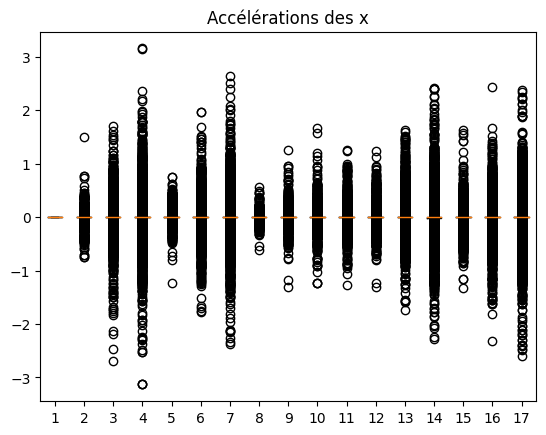

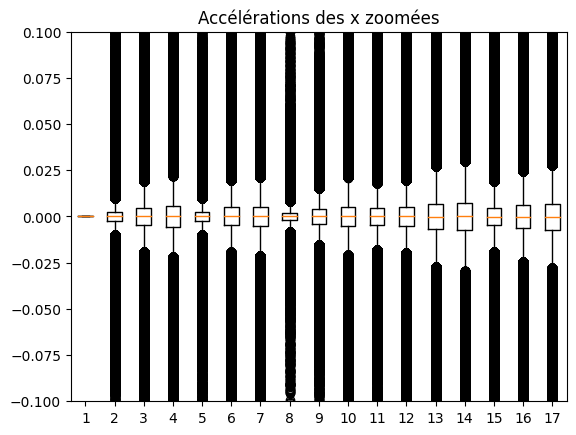

1 : Bassin, 2 : HancheD, 3 : GenouD, 4 : ChevilleD, 5 : HancheG, 6 : GenouG, 7 : ChevilleG, 8 : Colonne, 9 : Thorax, 10 : Cou, 11 : Tete, 12 : EpauleG, 13 : CoudeG, 14 : PoignetG, 15 : EpauleD, 16 : CoudeD, 17 : PoignetD, 


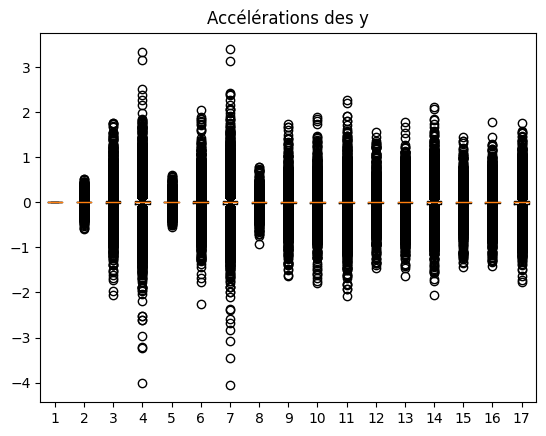

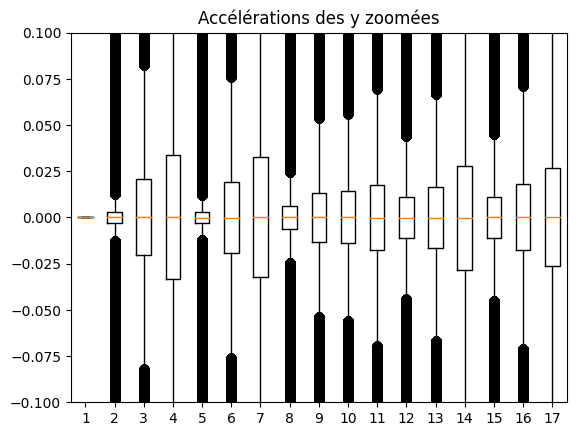

1 : Bassin, 2 : HancheD, 3 : GenouD, 4 : ChevilleD, 5 : HancheG, 6 : GenouG, 7 : ChevilleG, 8 : Colonne, 9 : Thorax, 10 : Cou, 11 : Tete, 12 : EpauleG, 13 : CoudeG, 14 : PoignetG, 15 : EpauleD, 16 : CoudeD, 17 : PoignetD, 


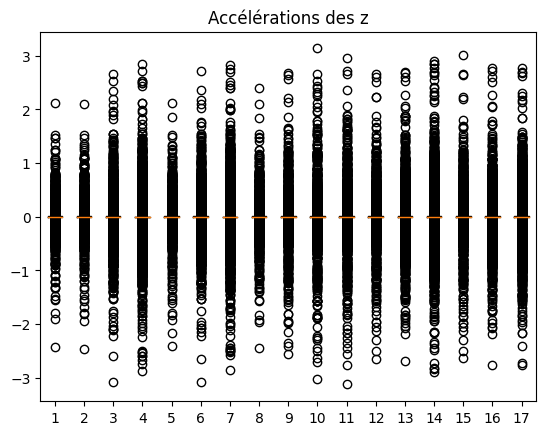

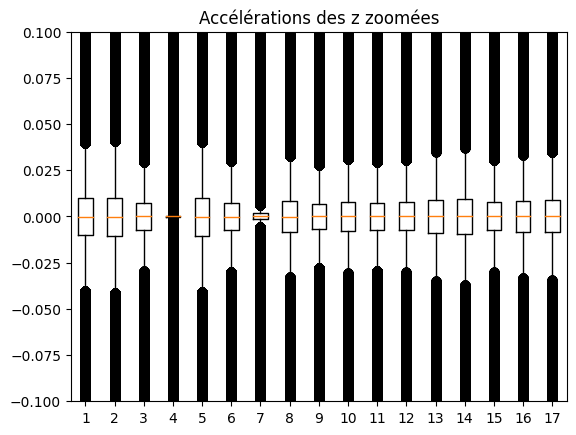

1 : Bassin, 2 : HancheD, 3 : GenouD, 4 : ChevilleD, 5 : HancheG, 6 : GenouG, 7 : ChevilleG, 8 : Colonne, 9 : Thorax, 10 : Cou, 11 : Tete, 12 : EpauleG, 13 : CoudeG, 14 : PoignetG, 15 : EpauleD, 16 : CoudeD, 17 : PoignetD, 


In [71]:
plt.boxplot(acceleration_x.dropna())
plt.title("Accélérations des x")
plt.show()
plt.boxplot(acceleration_x.dropna())
plt.title("Accélérations des x zoomées")
plt.ylim(-0.1,0.1)
plt.show()
print(affichage_partie_du_corps)
plt.boxplot(acceleration_y.dropna())
plt.title("Accélérations des y")
plt.show()
plt.boxplot(acceleration_y.dropna())
plt.title("Accélérations des y zoomées")
plt.ylim(-0.1,0.1)
plt.show()
print(affichage_partie_du_corps)
plt.boxplot(acceleration_z.dropna())
plt.title("Accélérations des z")
plt.show()
plt.boxplot(acceleration_z.dropna())
plt.title("Accélérations des z zoomées")
plt.ylim(-0.1,0.1)
plt.show()
print(affichage_partie_du_corps)

On remarque que les parties du corps qui vont le plus vite ou qui accélère le plus sont les extrémités du corps (poignets,coudes,chevilles et genoux) sur l'axe x alors que notamment le bassin, les hanches et la colonne sont plus stables sur cette axes. On voit qu'il y a beaucoup plus de mouvements sur l'axe y, les extrémités bougent toujours le plus, mais les parties comme le thorax, le coup et la tête se mettent aussi à bouger de façon significative, et le bassin, les hanches et la colonne restent les plus stables. Enfin sur l'axes z les parties de corps toutes a peu près de la même façon sauf les chevilles qui reste stables.